In [1]:
# 1. Backpropagation

import sympy as sp

a, b, c, d, e = sp.symbols('a b c d e')

f = 1 / ((1 + (a**b + c**d) * e)**2)

gradient = {
    'df/da': f.diff(a).subs({a: 1, b: 1, c: 1, d: 1, e: 1}),
    'df/db': f.diff(b).subs({a: 1, b: 1, c: 1, d: 1, e: 1}),
    'df/dc': f.diff(c).subs({a: 1, b: 1, c: 1, d: 1, e: 1}),
    'df/dd': f.diff(d).subs({a: 1, b: 1, c: 1, d: 1, e: 1}),
    'df/de': f.diff(e).subs({a: 1, b: 1, c: 1, d: 1, e: 1})
}

for var, derivative in gradient.items():
    print(f"{var}: {derivative}")

df/da: -2/27
df/db: 0
df/dc: -2/27
df/dd: 0
df/de: -4/27


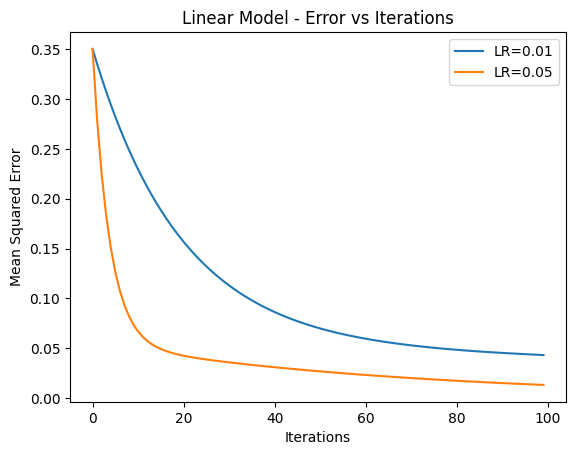

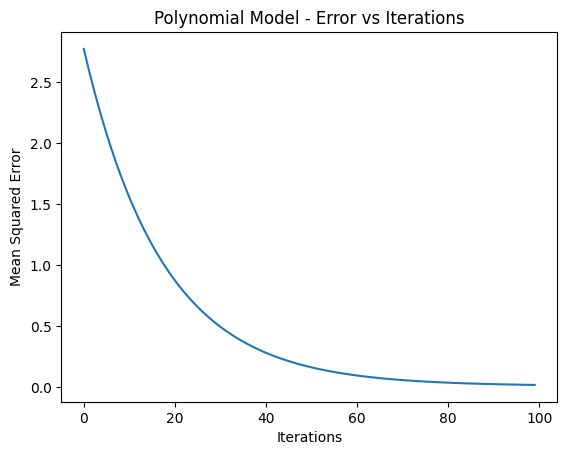

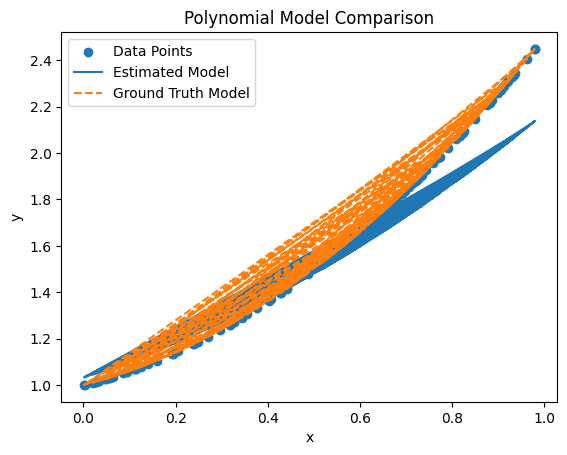

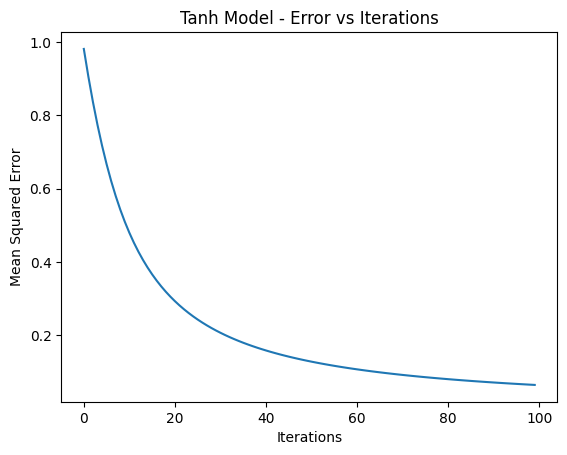

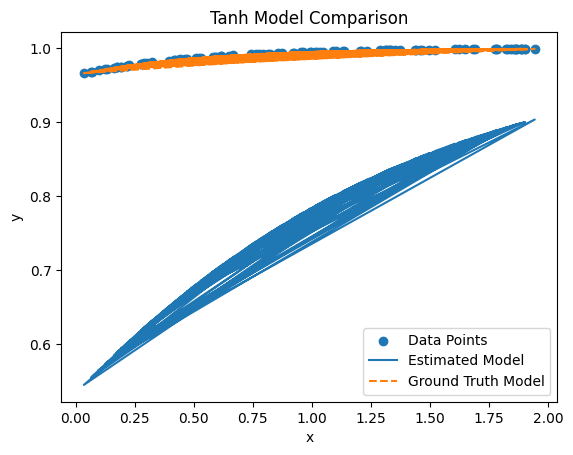

In [2]:
# 2. Gradient Descent

import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def linear_model(x, m=1, c=0):
    return m * x + c

def gradient_descent_linear(x, y, learning_rate=0.01, iterations=100):
    m, c = 0, 0
    N = len(y)
    errors = []

    for _ in range(iterations):
        y_pred = linear_model(x, m, c)
        D_m = (-2/N) * np.sum(x * (y - y_pred))
        D_c = (-2/N) * np.sum(y - y_pred)
        m = m - learning_rate * D_m
        c = c - learning_rate * D_c
        errors.append(mean_squared_error(y, y_pred))

    return m, c, errors

N = 100
x_linear = np.random.uniform(0, 1, N)
y_linear = linear_model(x_linear)

m_est_linear, c_est_linear, errors_linear = gradient_descent_linear(x_linear, y_linear)
plt.plot(errors_linear, label='LR=0.01')

m_est_linear_2, c_est_linear_2, errors_linear_2 = gradient_descent_linear(x_linear, y_linear, learning_rate=0.05)
plt.plot(errors_linear_2, label='LR=0.05')

plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Linear Model - Error vs Iterations')
plt.legend()
plt.show()

def polynomial_model(x, m1=0.5, m2=1, c=1):
    return m1 * x + m2 * x**2 + c

def gradient_descent_poly(x, y, learning_rate=0.01, iterations=100):
    m1, m2, c = 0, 0, 0
    errors = []

    for _ in range(iterations):
        y_pred = polynomial_model(x, m1, m2, c)
        D_m1 = (-2/N) * np.sum(x * (y - y_pred))
        D_m2 = (-2/N) * np.sum(x**2 * (y - y_pred))
        D_c = (-2/N) * np.sum(y - y_pred)
        m1 = m1 - learning_rate * D_m1
        m2 = m2 - learning_rate * D_m2
        c = c - learning_rate * D_c
        errors.append(mean_squared_error(y, y_pred))

    return m1, m2, c, errors

y_poly = polynomial_model(x_linear)  
m1_est, m2_est, c_est, errors_poly = gradient_descent_poly(x_linear, y_poly)

plt.plot(errors_poly)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Polynomial Model - Error vs Iterations')
plt.show()

plt.scatter(x_linear, y_poly, label='Data Points')
plt.plot(x_linear, polynomial_model(x_linear, m1_est, m2_est, c_est), label='Estimated Model')
plt.plot(x_linear, polynomial_model(x_linear, 0.5, 1, 1), label='Ground Truth Model', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Model Comparison')
plt.legend()
plt.show()

def tanh_model(x, m=1, c=2):
    return np.tanh(m * x + c)

def gradient_descent_tanh(x, y, learning_rate=0.01, iterations=100):
    m, c = 0, 0
    N = len(y)
    errors = []

    for _ in range(iterations):
        y_pred = tanh_model(x, m, c)
        D_m = (-2/N) * np.sum(x * (1 - y_pred**2) * (y - y_pred))
        D_c = (-2/N) * np.sum((1 - y_pred**2) * (y - y_pred))
        m = m - learning_rate * D_m
        c = c - learning_rate * D_c
        errors.append(mean_squared_error(y, y_pred))

    return m, c, errors

x_tanh = np.random.uniform(0, 2, N)
y_tanh = tanh_model(x_tanh)

m_est_tanh, c_est_tanh, errors_tanh = gradient_descent_tanh(x_tanh, y_tanh)

plt.plot(errors_tanh)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Tanh Model - Error vs Iterations')
plt.show()

plt.scatter(x_tanh, y_tanh, label='Data Points')
plt.plot(x_tanh, tanh_model(x_tanh, m_est_tanh, c_est_tanh), label='Estimated Model')
plt.plot(x_tanh, tanh_model(x_tanh, 1, 2), label='Ground Truth Model', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Tanh Model Comparison')
plt.legend()
plt.show()

In [3]:
# 3. ML Basics

import numpy as np

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    loss = -np.sum(y_true * np.log(y_pred + 1e-15)) / y_true.shape[0]
    return loss

def logistic_loss(W, b, x, y, lambda1, lambda2):
    """
    Compute the logistic loss with L1 and L2 regularization.

    :param W: numpy array, weights of the linear model
    :param b: numpy array, biases of the linear model
    :param x: numpy array, input data
    :param y: numpy array, one-hot encoded true labels
    :param lambda1: float, L1 regularization strength
    :param lambda2: float, L2 regularization strength
    :return: logistic loss with regularization
    """
    z = np.dot(x, W) + b
    y_pred = softmax(z)
    ce_loss = cross_entropy_loss(y, y_pred)

    l1_regularization = lambda1 * np.sum(np.abs(W))
    l2_regularization = lambda2 * np.sum(W ** 2)

    loss = ce_loss + l1_regularization + l2_regularization
    return loss

In [4]:
# 4. Classification Pipeline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
import pickle

N = 100
D = 2
K = 3 
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')
for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(penalty='l2', multi_class='multinomial', solver='saga', max_iter=1000)
model.fit(X_train, y_train)

training_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Training Accuracy: {training_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Accuracy Scores: {scores}")

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Regularization Parameter: {grid_search.best_params_}")

pickle.dump(X, open('dataX.pickle', 'wb'))
pickle.dump(y, open('dataY.pickle', 'wb'))

Training Accuracy: 0.55
Test Accuracy: 0.5
Cross-Validation Accuracy Scores: [0.03333333 0.01666667 0.61666667 1.         0.05      ]
Best Regularization Parameter: {'C': 0.01}


2024-01-22 22:13:57.591168: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
1688/1688 [==============================] - 7s 3ms/step - loss: 0.2717 - accuracy: 0.9219 - val_loss: 0.1398 - val_accuracy: 0.9613
Epoch 2/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1186 - accuracy: 0.9653 - val_loss: 0.0915 - val_accuracy: 0.9728
Epoch 3/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0803 - accuracy: 0.9755 - val_loss: 0.0839 - val_accuracy: 0.9750
Epoch 4/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0587 - accuracy: 0.9818 - val_loss: 0.0714 - val_accuracy: 0.9787
Epoch 5/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0459 - accuracy: 0.9856 - val_loss: 0.0764 - val_accuracy: 0.9780
313/313 - 0s - loss: 0.0771 - accuracy: 0.9763 - 441ms/epoch - 1ms/step
ReLU Model - Test Loss: 0.07708161324262619, Test Accuracy: 0.9763000011444092


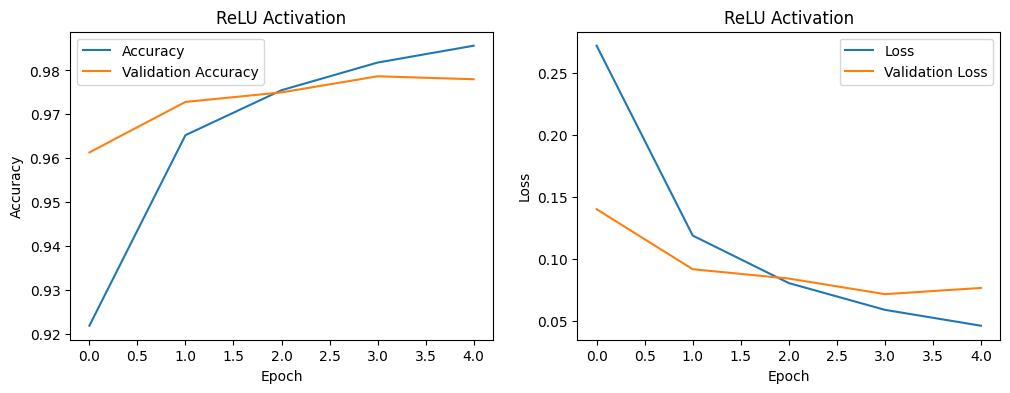

Epoch 1/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2792 - accuracy: 0.9185 - val_loss: 0.1314 - val_accuracy: 0.9633
Epoch 2/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1239 - accuracy: 0.9638 - val_loss: 0.0947 - val_accuracy: 0.9722
Epoch 3/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0846 - accuracy: 0.9745 - val_loss: 0.0807 - val_accuracy: 0.9770
Epoch 4/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0645 - accuracy: 0.9808 - val_loss: 0.0789 - val_accuracy: 0.9760
Epoch 5/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0492 - accuracy: 0.9853 - val_loss: 0.0791 - val_accuracy: 0.9770
313/313 - 1s - loss: 0.0760 - accuracy: 0.9761 - 503ms/epoch - 2ms/step
Leaky ReLU Model - Test Loss: 0.0760374441742897, Test Accuracy: 0.9761000275611877


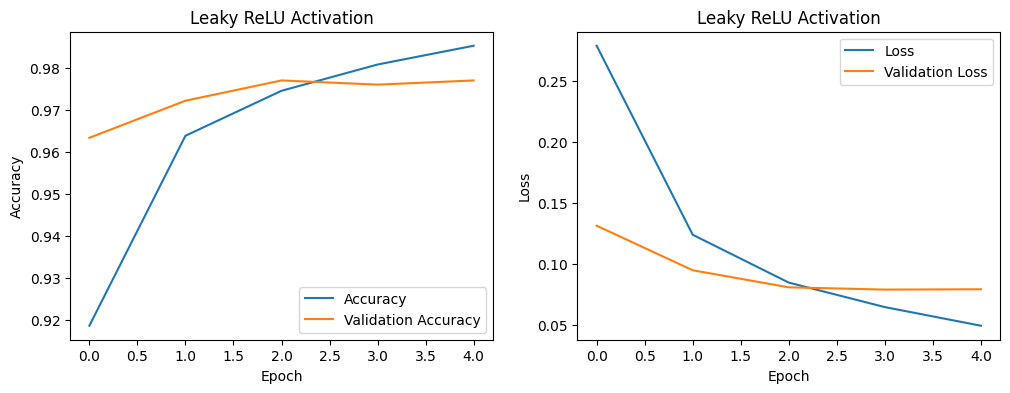

In [5]:
# 5. Feedforward Neural Networks

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU
from tensorflow.keras.datasets import mnist  # or fashion_mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def build_model(use_leaky_relu=False, hidden_units=128, optimizer='adam'):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(hidden_units, activation=LeakyReLU(alpha=0.01) if use_leaky_relu else 'relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_and_evaluate(model, epochs=5):
    history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.1)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    return history, test_loss, test_acc

def plot_training_history(history, title=''):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

model_relu = build_model(use_leaky_relu=False, hidden_units=128, optimizer='adam')
history_relu, test_loss_relu, test_acc_relu = train_and_evaluate(model_relu)
print(f"ReLU Model - Test Loss: {test_loss_relu}, Test Accuracy: {test_acc_relu}")
plot_training_history(history_relu, 'ReLU Activation')

model_leaky_relu = build_model(use_leaky_relu=True, hidden_units=128, optimizer='adam')
history_leaky_relu, test_loss_leaky_relu, test_acc_leaky_relu = train_and_evaluate(model_leaky_relu)
print(f"Leaky ReLU Model - Test Loss: {test_loss_leaky_relu}, Test Accuracy: {test_acc_leaky_relu}")
plot_training_history(history_leaky_relu, 'Leaky ReLU Activation')